In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

c:\Users\grego\Documents\code\covid_internship\./models\SIR.py:330: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(vars)==reach, str(len(vars)) + 'different from ' + str(reach))


In [2]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

df = pd.read_csv('deaths_and_infections.csv')

In [3]:
relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)

In [4]:


# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))
mob_shifted=np.concatenate((np.array([ 0 for i in range(17)]), mobility))
mob_17_days_ahead=(np.array([mob_shifted[i-17] for i in range(17, len(mob_shifted))]))


split = 35
reach=7
deaths_train=new_deaths[:split]
infected_train=n_infected[:split]
mob_train=mobility_smoothed[:split]
data_train=np.array([deaths_train, infected_train, mob_train])
dates_of_pandemic_train=dates_of_pandemic[:split]


data =np.array([ new_deaths, n_infected, mob_17_days_ahead ])

In [5]:
sir_model_m= Multi_SIRD_model()
sir_model_m.train(dates_of_pandemic_train, data_train)

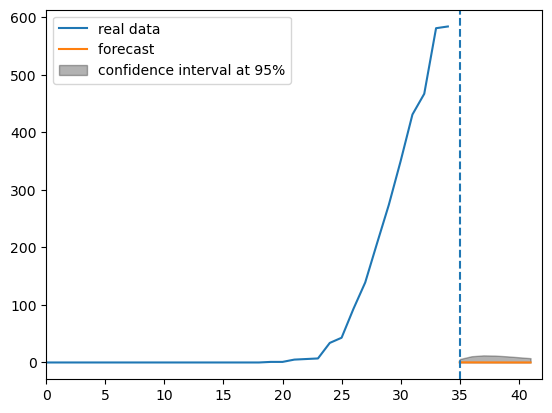

In [6]:
sir_model_m.plot(7, 0.05)

In [7]:
print(sir_model_m.n)
print(sir_model_m.a)
print(sir_model_m.b)
print(sir_model_m.d)

3.0000007236615547
5.122795544677608
1.3669943217202452
5.921409220116429e-05


In [8]:
round(1.7)

2

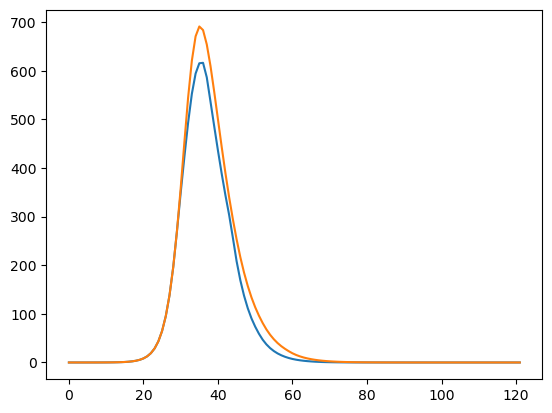

In [10]:
plt.plot(sir_for_optim_normalized([i for i in range(len(dates_of_pandemic_train))], sir_model_m.a, sir_model_m.b, sir_model_m.d, shift(data[2], 5), data_train[0], data_train[1], False) )
plt.plot(sir_for_optim_normalized([i for i in range(len(dates_of_pandemic_train))], sir_model_m.a, sir_model_m.b, sir_model_m.d, shift(data[2], 20), data_train[0], data_train[1], False) )
                         

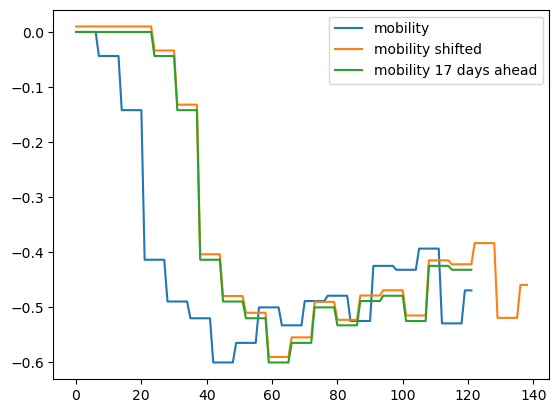

In [19]:
plt.plot(mobility, label='mobility')
plt.plot(mob_shifted+0.01, label='mobility shifted')
plt.plot(mob_17_days_ahead, label='mobility 17 days ahead')
plt.legend()

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


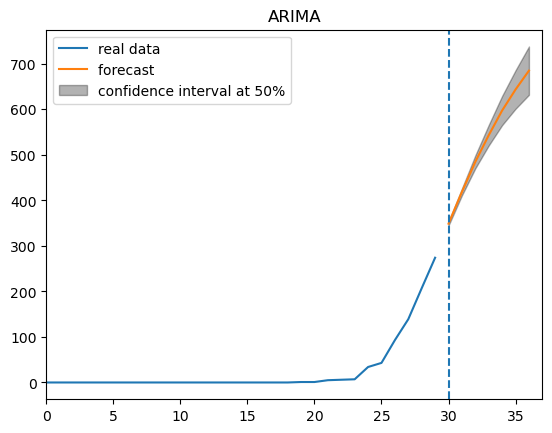

delta-method
[ 37070.1717655   56992.97514632  80567.09537463 104344.68952583
 123903.82933175 135545.12161569 137699.97788291]


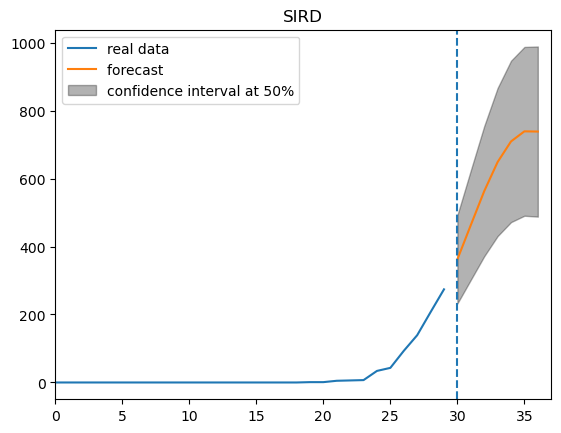

covariance method


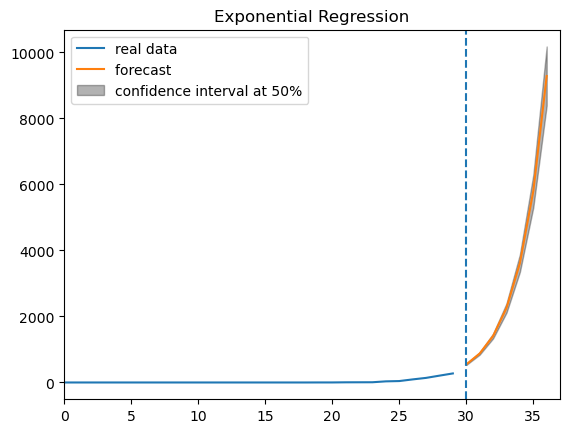

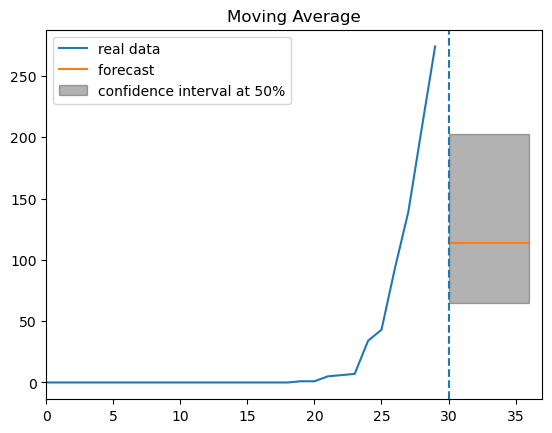

In [7]:
myarima=ARIMA_Model()
mySIRD=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
split=30
reach=7
alpha=0.5
myarima.train(dates_of_pandemic[:split], new_deaths[:split])
mySIRD.train(dates_of_pandemic[:split], new_deaths[:split])
myexp.train(dates_of_pandemic[:split], new_deaths[:split])
mymoving.train(dates_of_pandemic[:split], new_deaths[:split])
myarima.plot(reach, alpha, title='ARIMA')
mySIRD.plot(reach, alpha, title='SIRD')
myexp.plot(reach, alpha, title='Exponential Regression')
mymoving.plot(reach, alpha, title='Moving Average')


Comparison between SIRD2 with delta method and with samplings : 

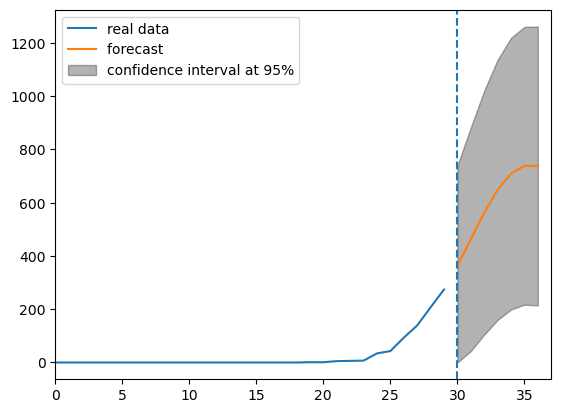

In [9]:
mysird2=SIRD_model_2()
mysird2.train(dates_of_pandemic[:30], new_deaths[:30])
mysird2.plot(7,0.05)

# multivariate sampling with intervals based on delta method

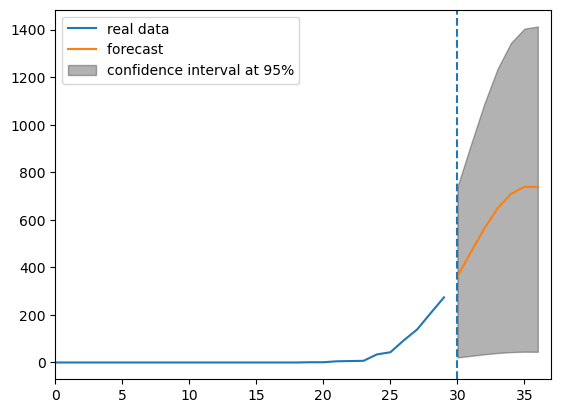

In [2]:
mysird2=SIRD_model_2()
mysird2.train(dates_of_pandemic[:30], new_deaths[:30])
mysird2.plot(7,0.05)

# multivariate sampling with intervals based on sampling the parameters

**Evaluating models**

In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [2]:
myarima=ARIMA_Model()
mysir=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
truth=Truth()
alphas=[0.05,0.1,0.5]
index_points=[30]
reach=7
weights=[1,1,1,1]


In [3]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
dispersion for alpha =  0.05
the interval is:  (119.55199357531978, 1344.3420434676)

dispersion for alpha =  0.1
the interval is:  (128.156831174565, 1294.709062378066)

dispersion for alpha =  0.5
the interval is:  (600.6900296423914, 992.5617279053904)



814.6925704854245

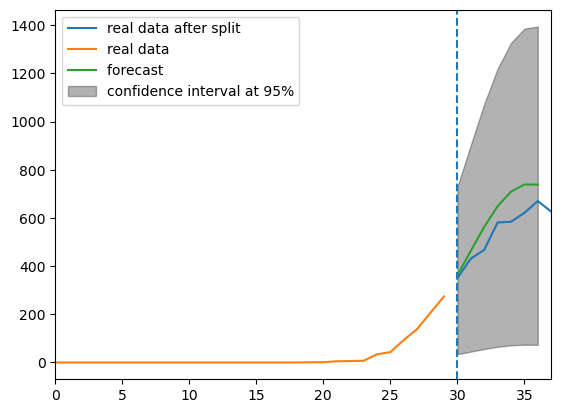

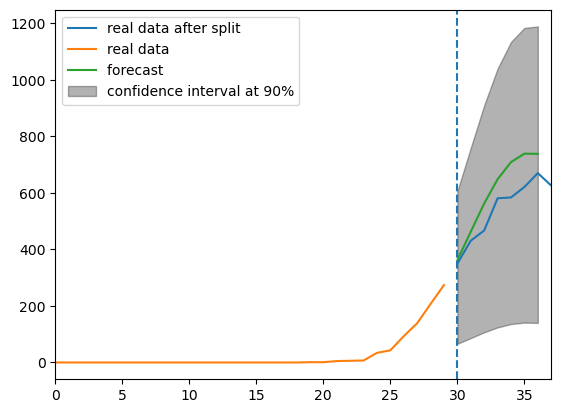

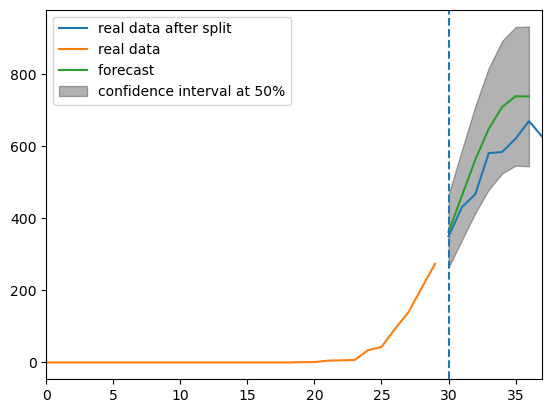

In [11]:
mysir.train(dates_of_pandemic[:30], new_deaths[:30])
plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.05)

plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.1)


plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.5)

In [6]:
evaluate_model(model=truth, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


0.0

In [4]:
evaluate_model(model=truth, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


0.0

In [7]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


196.74120170056491

In [5]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


196.74120170056491

In [8]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


780.8320488975481

In [6]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


837.716952036619

In [9]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
covariance method
covariance method
covariance method
underprediction
point 670.0
l 6683.697282067345
underprediction
point 670.0
l 7101.858602213807
underprediction
point 670.0
l 8389.561878080918


120010.14049179564

In [7]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
covariance method
covariance method
covariance method


120010.14049179564

In [10]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


7505.162207609593

In [8]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


7092.687903440425